# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
url_for_each_city = url + "&q=" + "kimbe"
try:
    weather_for_each_city= requests.get(url_for_each_city).json()
    print(weather_for_each_city)
except:
    print("City not found")


{'coord': {'lon': 150.15, 'lat': -5.56}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'model', 'main': {'temp': 71.29, 'pressure': 1008, 'humidity': 96, 'temp_min': 71.29, 'temp_max': 71.29, 'sea_level': 1008, 'grnd_level': 995}, 'wind': {'speed': 4.21, 'deg': 143}, 'rain': {'3h': 1.31}, 'clouds': {'all': 100}, 'dt': 1573396799, 'sys': {'country': 'PG', 'sunrise': 1573414379, 'sunset': 1573458828}, 'timezone': 36000, 'id': 2093967, 'name': 'Kimbe', 'cod': 200}


In [5]:
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key   

data_for_each_city = []

record_count = 1
set_count = 0
print("Beginning Data Retrieval")   
print("-----------------------------")
for i, city in enumerate(cities):
    if(i % 50 == 0):
        set_count = set_count + 1
        record_count = 1
    print(f"Processing Record {record_count} of Set {set_count} |  {city}")
    record_count = record_count + 1
    
    url_for_each_city = url + "&q=" + city
    
    try:
        weather_for_each_city= requests.get(url_for_each_city).json()
        cloudiness = weather_for_each_city['clouds']['all']
        country = weather_for_each_city['sys']['country']
        date = weather_for_each_city['dt']
        latitude = weather_for_each_city['coord']['lat']
        longitude = weather_for_each_city['coord']['lon']
        max_temp = weather_for_each_city['main']['temp_max']
        humidity = weather_for_each_city['main']['humidity']
        wind_speed = weather_for_each_city['wind']['speed']
        data_for_each_city.append({"City": city, 
                                   "Cloudiness":cloudiness,
                                   "Country": country,
                                   "Date": date,
                                   "Lat":latitude,
                                   "Lon":longitude,
                                   "Max Temp": max_temp,
                                   "Humidity":humidity,
                                   "Wind Speed":wind_speed}) 
       
    except:
        print(f"City not found. Skipping...")
        pass
print("-----------------------------")
print("Data Retrieval Complete")     
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 |  kapaa
Processing Record 2 of Set 1 |  ushuaia
Processing Record 3 of Set 1 |  faanui
Processing Record 4 of Set 1 |  touros
Processing Record 5 of Set 1 |  san felipe
Processing Record 6 of Set 1 |  souillac
Processing Record 7 of Set 1 |  rikitea
Processing Record 8 of Set 1 |  nikolskoye
Processing Record 9 of Set 1 |  abu kamal
Processing Record 10 of Set 1 |  harper
Processing Record 11 of Set 1 |  atuona
Processing Record 12 of Set 1 |  jamestown
Processing Record 13 of Set 1 |  east london
Processing Record 14 of Set 1 |  saldanha
Processing Record 15 of Set 1 |  port elizabeth
Processing Record 16 of Set 1 |  matara
Processing Record 17 of Set 1 |  albany
Processing Record 18 of Set 1 |  qaanaaq
Processing Record 19 of Set 1 |  mataura
Processing Record 20 of Set 1 |  puerto ayora
Processing Record 21 of Set 1 |  castro
Processing Record 22 of Set 1 |  nelson bay
Processing Record 23 of Set 1 

Processing Record 34 of Set 4 |  semme
Processing Record 35 of Set 4 |  acapulco
Processing Record 36 of Set 4 |  mehamn
Processing Record 37 of Set 4 |  ancud
Processing Record 38 of Set 4 |  san patricio
Processing Record 39 of Set 4 |  tessalit
Processing Record 40 of Set 4 |  mamallapuram
Processing Record 41 of Set 4 |  kalabo
Processing Record 42 of Set 4 |  lagoa
Processing Record 43 of Set 4 |  fare
Processing Record 44 of Set 4 |  tottori
Processing Record 45 of Set 4 |  bur gabo
City not found. Skipping...
Processing Record 46 of Set 4 |  svetlogorsk
Processing Record 47 of Set 4 |  rio de janeiro
Processing Record 48 of Set 4 |  saint-pierre
Processing Record 49 of Set 4 |  hay river
Processing Record 50 of Set 4 |  laguna
Processing Record 1 of Set 5 |  maragogi
Processing Record 2 of Set 5 |  kuytun
Processing Record 3 of Set 5 |  port blair
Processing Record 4 of Set 5 |  saskylakh
Processing Record 5 of Set 5 |  margate
Processing Record 6 of Set 5 |  pran buri
Processin

Processing Record 16 of Set 8 |  henties bay
Processing Record 17 of Set 8 |  dinsor
City not found. Skipping...
Processing Record 18 of Set 8 |  alappuzha
City not found. Skipping...
Processing Record 19 of Set 8 |  kitgum
Processing Record 20 of Set 8 |  clyde river
Processing Record 21 of Set 8 |  susanville
Processing Record 22 of Set 8 |  norrtalje
Processing Record 23 of Set 8 |  samarkand
Processing Record 24 of Set 8 |  capitao poco
Processing Record 25 of Set 8 |  bilibino
Processing Record 26 of Set 8 |  sao joao da barra
Processing Record 27 of Set 8 |  tawau
Processing Record 28 of Set 8 |  yaring
Processing Record 29 of Set 8 |  vila
Processing Record 30 of Set 8 |  longyearbyen
Processing Record 31 of Set 8 |  kloulklubed
Processing Record 32 of Set 8 |  vila velha
Processing Record 33 of Set 8 |  mafinga
City not found. Skipping...
Processing Record 34 of Set 8 |  kalomo
City not found. Skipping...
Processing Record 35 of Set 8 |  kochubey
Processing Record 36 of Set 8 |

Processing Record 42 of Set 11 |  collie
Processing Record 43 of Set 11 |  gimli
Processing Record 44 of Set 11 |  aksu
Processing Record 45 of Set 11 |  ponta do sol
Processing Record 46 of Set 11 |  kangly
Processing Record 47 of Set 11 |  senanga
Processing Record 48 of Set 11 |  strezhevoy
Processing Record 49 of Set 11 |  rio tinto
Processing Record 50 of Set 11 |  jiuquan
Processing Record 1 of Set 12 |  yeniseysk
Processing Record 2 of Set 12 |  letnik
Processing Record 3 of Set 12 |  mus
Processing Record 4 of Set 12 |  bua yai
Processing Record 5 of Set 12 |  kirby
Processing Record 6 of Set 12 |  hanstholm
Processing Record 7 of Set 12 |  honiara
Processing Record 8 of Set 12 |  lavrentiya
Processing Record 9 of Set 12 |  chara
Processing Record 10 of Set 12 |  hobyo
Processing Record 11 of Set 12 |  lensk
Processing Record 12 of Set 12 |  loukhi
Processing Record 13 of Set 12 |  okato
Processing Record 14 of Set 12 |  egvekinot
Processing Record 15 of Set 12 |  ulladulla
Pro

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
df_weather = pd.DataFrame(data_for_each_city)
df_weather.to_csv("weather.csv")
df_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,kapaa,75,US,1573397046,94,22.08,-159.32,73.40,6.93
1,ushuaia,0,AR,1573397046,76,-54.81,-68.31,48.20,5.82
2,faanui,100,PF,1573397046,79,-16.48,-151.75,79.81,19.93
3,touros,75,BR,1573397047,55,-5.20,-35.46,86.00,16.11
4,san felipe,0,CL,1573397047,27,-32.75,-70.73,91.99,5.70


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

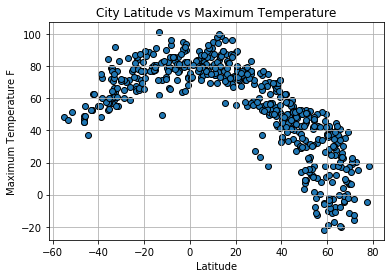

In [11]:
lat = df_weather["Lat"]
max_temp = df_weather["Max Temp"]
plt.scatter(lat,max_temp,edgecolor="black")
plt.grid(True)
plt.title("City Latitude vs Maximum Temperature")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature F")
plt.savefig("LatVsTemp.png")
plt.show()

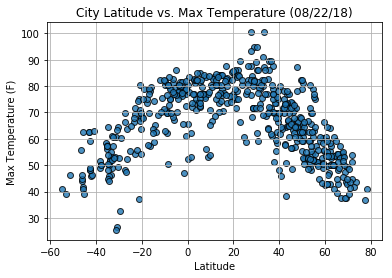

#### Latitude vs. Humidity Plot

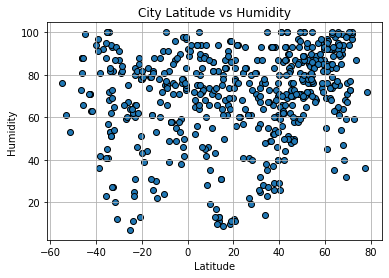

In [17]:
lat = df_weather["Lat"]
hum = df_weather["Humidity"]
plt.scatter(lat,hum,edgecolor="black")
plt.grid(True)
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("LatVsHum.png")
plt.show()

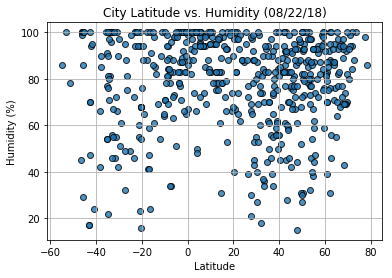

#### Latitude vs. Cloudiness Plot

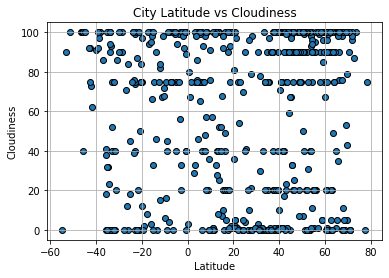

In [16]:
lat = df_weather["Lat"]
cloud = df_weather["Cloudiness"]
plt.scatter(lat,cloud,edgecolor="black")
plt.grid(True)
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("LatVsCloud.png")
plt.show()

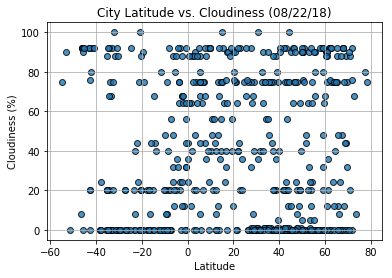

#### Latitude vs. Wind Speed Plot

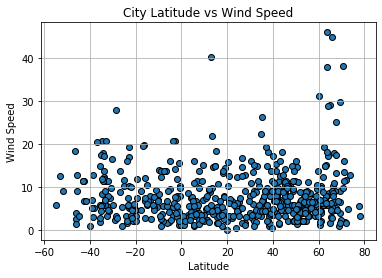

In [15]:
lat = df_weather["Lat"]
wind = df_weather["Wind Speed"]
plt.scatter(lat,wind,edgecolor="black")
plt.grid(True)
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("LatVsWind.png")
plt.show()

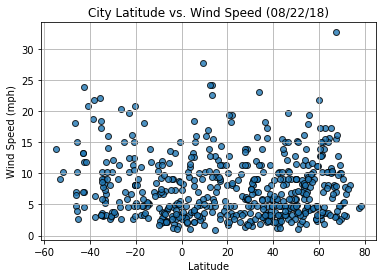